# Movie Genre Prediction(MGP) using NLP
*Hemansh Anand*

---

# Notebook 1: EDA and Encoding the Dataset

The main purpose of this notebook is to analyse and visualise the dataset. The irrelevant features(columns) in the dataset will be dropped and only the relevant fautures will be retained. We will then encode the genres into the dataset and make a new dataset ready for Pre Processing in the next notebook.

**This notebook accomplishes two primary tasks:**

1.   Analyse and Visualise the Dataset
2.   Encoding the Genres into the Datset




# Problem Statement and Motivation

The goal of this project is to build a machine mearning model in order to predict movie genres based on their plot descriptions. These are the sub goals of this project:


*   Apply TF-IDF transformation to movie plot.
*   Use classic machine-learning techniques to classify movies as one or more genres using the transformed plots.



### Import the Libraries and Dataset

In [ ]:
import pandas as pd
import numpy as np
import json
import nltk
import re
import csv
import matplotlib.pyplot as plt 
import seaborn as sns
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Files/MGP/Datasets/movie.metadata.tsv',sep = '\t', header = None)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science Fiction"", ""/m/03npn"": ""Horror"", ""/m/03k9fj"": ""Adventure"", ""/m/0fdjb"": ""Supernatural"", ""/m/02kdv5l"": ""Action"", ""/m/09zvmj"": ""Space western""}"
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey Mystery,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0"": ""Drama"", ""/m/0hj3n01"": ""Crime Drama""}"
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""Drama""}"
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic thriller"", ""/m/09blyk"": ""Psychological thriller""}"
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


### Renaming Columns

In [ ]:
df.columns = ["movie_id",1,"movie_name",3,4,5,6,7,"genre"]

In [ ]:
plots = []

with open("/content/drive/MyDrive/Colab Files/MGP/Datasets/plot_summaries.txt", 'r') as plot_txt:
       reader = csv.reader(plot_txt, dialect='excel-tab') 
       for row in tqdm(reader):
            plots.append(row)

42303it [00:00, 44296.35it/s]


In [ ]:
movie_id = []
plot = []

# extract movie Ids and plot summaries
for i in tqdm(plots):
  movie_id.append(i[0])
  plot.append(i[1])

# create dataframe
movies = pd.DataFrame({'movie_id': movie_id, 'plot': plot})

100%|██████████| 42303/42303 [00:00<00:00, 1033761.03it/s]


In [ ]:
movies.head()

,movie_id,plot
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha, a saxophonist, develop a bizarre love-hate relationship, and despite their prejudices, realize they aren't so different after all."
1,31186339,"The nation of Panem consists of a wealthy Capitol and twelve poorer districts. As punishment for a past rebellion, each district must provide a boy and girl between the ages of 12 and 18 selected by lottery for the annual Hunger Games. The tributes must fight to the death in an arena; the sole..."
2,20663735,"Poovalli Induchoodan is sentenced for six years prison life for murdering his classmate. Induchoodan, the only son of Justice Maranchery Karunakara Menon was framed in the case by Manapally Madhavan Nambiar and his crony DYSP Sankaranarayanan to take revenge on idealist judge Menon who had e..."
3,2231378,"The Lemon Drop Kid , a New York City swindler, is illegally touting horses at a Florida racetrack. After several successful hustles, the Kid comes across a beautiful, but gullible, woman intending to bet a lot of money. The Kid convinces her to switch her bet, employing a prefabricated con. Unfo..."
4,595909,"Seventh-day Adventist Church pastor Michael Chamberlain, his wife Lindy, their two sons, and their nine-week-old daughter Azaria are on a camping holiday in the Outback. With the baby sleeping in their tent, the family is enjoying a barbecue with their fellow campers when a cry is heard. Lindy r..."


### Changing the data type of movie id and merging the dataframes

In [ ]:
# change datatype of 'movie_id'
df['movie_id'] = df['movie_id'].astype(str)

# merge meta with movies
movies = pd.merge(movies, df[['movie_id', 'movie_name', 'genre']], on = 'movie_id')

movies.head()

,movie_id,plot,movie_name,genre
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha, a saxophonist, develop a bizarre love-hate relationship, and despite their prejudices, realize they aren't so different after all.",Taxi Blues,"{""/m/07s9rl0"": ""Drama"", ""/m/03q4nz"": ""World cinema""}"
1,31186339,"The nation of Panem consists of a wealthy Capitol and twelve poorer districts. As punishment for a past rebellion, each district must provide a boy and girl between the ages of 12 and 18 selected by lottery for the annual Hunger Games. The tributes must fight to the death in an arena; the sole...",The Hunger Games,"{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"": ""Science Fiction"", ""/m/02kdv5l"": ""Action"", ""/m/07s9rl0"": ""Drama""}"
2,20663735,"Poovalli Induchoodan is sentenced for six years prison life for murdering his classmate. Induchoodan, the only son of Justice Maranchery Karunakara Menon was framed in the case by Manapally Madhavan Nambiar and his crony DYSP Sankaranarayanan to take revenge on idealist judge Menon who had e...",Narasimham,"{""/m/04t36"": ""Musical"", ""/m/02kdv5l"": ""Action"", ""/m/07s9rl0"": ""Drama"", ""/m/01chg"": ""Bollywood""}"
3,2231378,"The Lemon Drop Kid , a New York City swindler, is illegally touting horses at a Florida racetrack. After several successful hustles, the Kid comes across a beautiful, but gullible, woman intending to bet a lot of money. The Kid convinces her to switch her bet, employing a prefabricated con. Unfo...",The Lemon Drop Kid,"{""/m/06qm3"": ""Screwball comedy"", ""/m/01z4y"": ""Comedy""}"
4,595909,"Seventh-day Adventist Church pastor Michael Chamberlain, his wife Lindy, their two sons, and their nine-week-old daughter Azaria are on a camping holiday in the Outback. With the baby sleeping in their tent, the family is enjoying a barbecue with their fellow campers when a cry is heard. Lindy r...",A Cry in the Dark,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""Drama"", ""/m/01f9r0"": ""Docudrama"", ""/m/03q4nz"": ""World cinema"", ""/m/05bh16v"": ""Courtroom Drama""}"


In [ ]:
movies['genre'][0]

'{"/m/07s9rl0": "Drama", "/m/03q4nz": "World cinema"}'

In [ ]:
type(json.loads(movies['genre'][0]))

dict

In [ ]:
json.loads(movies['genre'][0]).values()

dict_values(['Drama', 'World cinema'])

In [ ]:
# an empty list
genres = [] 

# extract genres
for i in movies['genre']: 
  genres.append(list(json.loads(i).values())) 

# add to 'movies' dataframe  
movies['genre_new'] = genres

In [ ]:
del movies['genre']

In [ ]:
movies.head()

,movie_id,plot,movie_name,genre_new
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha, a saxophonist, develop a bizarre love-hate relationship, and despite their prejudices, realize they aren't so different after all.",Taxi Blues,"[Drama, World cinema]"
1,31186339,"The nation of Panem consists of a wealthy Capitol and twelve poorer districts. As punishment for a past rebellion, each district must provide a boy and girl between the ages of 12 and 18 selected by lottery for the annual Hunger Games. The tributes must fight to the death in an arena; the sole...",The Hunger Games,"[Action/Adventure, Science Fiction, Action, Drama]"
2,20663735,"Poovalli Induchoodan is sentenced for six years prison life for murdering his classmate. Induchoodan, the only son of Justice Maranchery Karunakara Menon was framed in the case by Manapally Madhavan Nambiar and his crony DYSP Sankaranarayanan to take revenge on idealist judge Menon who had e...",Narasimham,"[Musical, Action, Drama, Bollywood]"
3,2231378,"The Lemon Drop Kid , a New York City swindler, is illegally touting horses at a Florida racetrack. After several successful hustles, the Kid comes across a beautiful, but gullible, woman intending to bet a lot of money. The Kid convinces her to switch her bet, employing a prefabricated con. Unfo...",The Lemon Drop Kid,"[Screwball comedy, Comedy]"
4,595909,"Seventh-day Adventist Church pastor Michael Chamberlain, his wife Lindy, their two sons, and their nine-week-old daughter Azaria are on a camping holiday in the Outback. With the baby sleeping in their tent, the family is enjoying a barbecue with their fellow campers when a cry is heard. Lindy r...",A Cry in the Dark,"[Crime Fiction, Drama, Docudrama, World cinema, Courtroom Drama]"


Remove samples with zero genre tags

In [ ]:
movies_new = movies[~(movies['genre_new'].str.len() == 0)]

In [ ]:
movies_new.shape, movies.shape

((41793, 4), (42204, 4))

Removed 411 samples with no genre tags

Let's find the number of movie genres which have been covered in this dataset

In [ ]:
all_genres = sum(genres,[])
len(set(all_genres))

363

There are 363 Genres in this dataset. Let's have a closer look at the genres

Using FreqDist() from nltk libarary, let's create a dictionary of genres and their count accross our dataset.

In [ ]:
all_genres_dict = nltk.FreqDist(all_genres) 

Convert it to a dataframe

In [ ]:
all_genres_df = pd.DataFrame({'Genre': list(all_genres_dict.keys()), 'Count': list(all_genres_dict.values())})

In [ ]:
all_genres_df

,Genre,Count
0,Drama,19134
1,World cinema,5153
2,Action/Adventure,3553
3,Science Fiction,2339
4,Action,5868
...,...,...
358,Statutory rape,1
359,Silhouette animation,1
360,Children's Issues,1
361,Homoeroticism,1


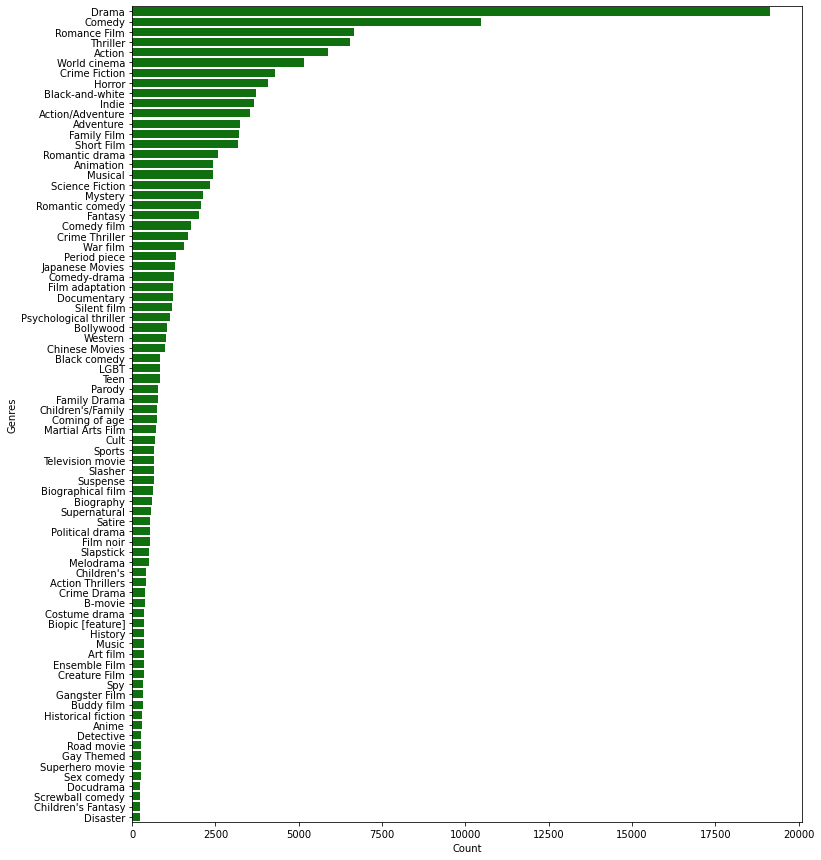

In [ ]:
gen = all_genres_df.nlargest(columns="Count", n = 80) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=gen, x= "Count", y = "Genre",color='green') 
ax.set(ylabel = 'Genres',xlabel = 'Count') 
plt.show()

These are just the top 80 Genres displayed. 

It is difficult to build a prediction model with good accuracy because:

*   There are too many classes
*   Many of the sub genre classes have few observation as compared to the main genres



Solution to this problem?

We need to reduce the number of genres in this dataset. This can be achieved by:

*   Absorbing or Clubbing sub genres to a main group of genres
*   Removing redundant genres



But this solution is time consuming and this time can be better invested in trying out different experiment setups rather than cleaning the data. So, I decided to use another dataset which has just 25 Genres.

I had proposed the idea to the group to change the dataset but 2 group members had already made progress in their experiments so the group declined to change the dataset.



# **Justification to use different dataset:**

I decided to go forward with this new dataset as the data contains more or less the same movies but it's a better and much cleaner data. The end result will be same, i.e. Movie Genre Prediction and if the model gets trained better because of the quality of this data it will be beneficial to the group in the deployment stage. As decided in the group, I will still be trying out the same setups that I have been assigned to me.

[New Dataset](https://drive.google.com/file/d/1VBRM9t7Rfbsf9chATXAMustlMS2tkSRk/view?usp=sharing)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Files/MGP/Datasets/imdb_dataset.tsv', sep='\t', index_col=0)
df.head(5)

,tconst,title,release_year,release_date,MPAA,genre,runtime,poster_url,plot_short,plot_long,imdb_rating,num_imdb_votes,plot_full,metacritic,num_user_reviews,num_critic_reviews
0,tt0010323,Das Cabinet des Dr. Caligari,1920,27 February 1920,Not Rated,"['Fantasy', 'Horror', 'Mystery', 'Thriller']",67,https://m.media-amazon.com/images/M/MV5BNWJiNG...,"Hypnotist Dr. Caligari uses a somnambulist, Ce...","Francis, a young man, recalls in his memory th...",8.1,52815,THE CABINET OF DR. CALIGARIFrancis (Friedrich ...,NaN,222.0,156.0
1,tt0011237,"Der Golem, wie er in die Welt kam",1920,19 June 1921,Unrated,"['Fantasy', 'Horror']",91,https://m.media-amazon.com/images/M/MV5BMTQ5MT...,"In 16th-century Prague, a rabbi creates the Go...","In 16th-century Prague, a rabbi creates the Go...",7.2,6136,NaN,NaN,49.0,45.0
2,tt0011841,Way Down East,1920,3 September 1920,Passed,"['Drama', 'Romance']",145,https://m.media-amazon.com/images/M/MV5BMjI5OT...,A naive country girl is tricked into a sham ma...,"The callous rich, portrayed by Lennox, think o...",7.4,4800,NaN,NaN,49.0,28.0
3,tt0011130,Dr. Jekyll and Mr. Hyde,1920,28 September 1920,Unrated,"['Drama', 'Horror', 'Sci-Fi']",82,https://m.media-amazon.com/images/M/MV5BMzE5Yj...,Dr. Henry Jekyll experiments with scientific m...,Based on the Robert Louis Stevenson story: Doc...,7.0,4564,NaN,NaN,71.0,65.0
4,tt0011870,Within Our Gates,1920,12 January 1920,Not Rated,"['Drama', 'Romance']",79,https://m.media-amazon.com/images/M/MV5BOGZhYj...,"Abandoned by her fiancé, an educated black wom...",Southern negro Sylvia Landry visits her cousin...,6.3,2139,NaN,NaN,20.0,13.0


This dataset has many columns which we don't require in our model building, hence it's better to drop down these columns.

In [ ]:
df = df.drop(['tconst','title','release_year','release_date','MPAA','runtime','poster_url','imdb_rating',
              'num_imdb_votes','plot_full','metacritic','num_user_reviews','num_critic_reviews'], axis=1)
df.head()

,genre,plot_short,plot_long
0,"['Fantasy', 'Horror', 'Mystery', 'Thriller']","Hypnotist Dr. Caligari uses a somnambulist, Ce...","Francis, a young man, recalls in his memory th..."
1,"['Fantasy', 'Horror']","In 16th-century Prague, a rabbi creates the Go...","In 16th-century Prague, a rabbi creates the Go..."
2,"['Drama', 'Romance']",A naive country girl is tricked into a sham ma...,"The callous rich, portrayed by Lennox, think o..."
3,"['Drama', 'Horror', 'Sci-Fi']",Dr. Henry Jekyll experiments with scientific m...,Based on the Robert Louis Stevenson story: Doc...
4,"['Drama', 'Romance']","Abandoned by her fiancé, an educated black wom...",Southern negro Sylvia Landry visits her cousin...


Let's check for null values if any

In [ ]:
df.isna().sum()

genre          0
plot_short    37
plot_long     37
dtype: int64

In [ ]:
df = df.dropna(axis=0, subset=['plot_short'])

In [ ]:
df.isna().sum()

genre         0
plot_short    0
plot_long     0
dtype: int64

There are no null values in the data now.

Let's find out the number of genres this dataset contains

In [ ]:
total_genres = []

for row in df['genre']:
    i = row.strip('[]').replace("'",'').split(', ')
    for gen in i:
        total_genres.append(gen)
        
total_genres = list(set(total_genres))

In [ ]:
len(total_genres)

25

Let's sort the genres alphabetically and view the list

In [ ]:
total_genres.sort()
total_genres = [i.lower() for i in total_genres]
print(total_genres)

['action', 'adult', 'adventure', 'animation', 'biography', 'comedy', 'crime', 'documentary', 'drama', 'family', 'fantasy', 'film-noir', 'game-show', 'history', 'horror', 'music', 'musical', 'mystery', 'news', 'romance', 'sci-fi', 'sport', 'thriller', 'war', 'western']


It's time to encode these genres.

To do this task, I could have used the MultiLabelBinarizer() but I felt that simply iterating over the data was an efficient solution.

First, I have created 25 new columns for the 25 genres in this dataset.

In [ ]:
for gen in total_genres:
    df.loc[:, gen] = 0

In [ ]:
df.head()

,genre,plot_short,plot_long,action,adult,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,film-noir,game-show,history,horror,music,musical,mystery,news,romance,sci-fi,sport,thriller,war,western
0,"['Fantasy', 'Horror', 'Mystery', 'Thriller']","Hypnotist Dr. Caligari uses a somnambulist, Ce...","Francis, a young man, recalls in his memory th...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"['Fantasy', 'Horror']","In 16th-century Prague, a rabbi creates the Go...","In 16th-century Prague, a rabbi creates the Go...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"['Drama', 'Romance']",A naive country girl is tricked into a sham ma...,"The callous rich, portrayed by Lennox, think o...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"['Drama', 'Horror', 'Sci-Fi']",Dr. Henry Jekyll experiments with scientific m...,Based on the Robert Louis Stevenson story: Doc...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"['Drama', 'Romance']","Abandoned by her fiancé, an educated black wom...",Southern negro Sylvia Landry visits her cousin...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Columns have been created for the 25 genres in our dataset. Now I will encode the genre columns.

In [ ]:
for i in df.index:
    for g in total_genres:
        df.loc[ df.index == i, g ] = int(g in df['genre'][i].lower())
    if i % 100 == 0:
        print(i, end='\r')

In [ ]:
df.head()

,genre,plot_short,plot_long,action,adult,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,film-noir,game-show,history,horror,music,musical,mystery,news,romance,sci-fi,sport,thriller,war,western
0,"['Fantasy', 'Horror', 'Mystery', 'Thriller']","Hypnotist Dr. Caligari uses a somnambulist, Ce...","Francis, a young man, recalls in his memory th...",0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0
1,"['Fantasy', 'Horror']","In 16th-century Prague, a rabbi creates the Go...","In 16th-century Prague, a rabbi creates the Go...",0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"['Drama', 'Romance']",A naive country girl is tricked into a sham ma...,"The callous rich, portrayed by Lennox, think o...",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,"['Drama', 'Horror', 'Sci-Fi']",Dr. Henry Jekyll experiments with scientific m...,Based on the Robert Louis Stevenson story: Doc...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,"['Drama', 'Romance']","Abandoned by her fiancé, an educated black wom...",Southern negro Sylvia Landry visits her cousin...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
genre_gin = []
genre = []

for g in total_genres:
    genre.append(g)
    genre_gin.append(df[g].value_counts()[1])

genre_dict = dict(zip(genre, genre_gin))

genre_df = pd.DataFrame.from_dict(genre_dict,orient='index')
genre_df = genre_df.reset_index()
genre_df.columns = ['Genre','Count']
genre_df = genre_df.sort_values('Count', ascending=False)
genre_df

,Genre,Count
8,drama,16750
5,comedy,10564
22,thriller,7515
19,romance,6732
0,action,5490
6,crime,4919
14,horror,4033
2,adventure,3339
17,mystery,2776
20,sci-fi,2477


Let's visualise this data and find out the outliers

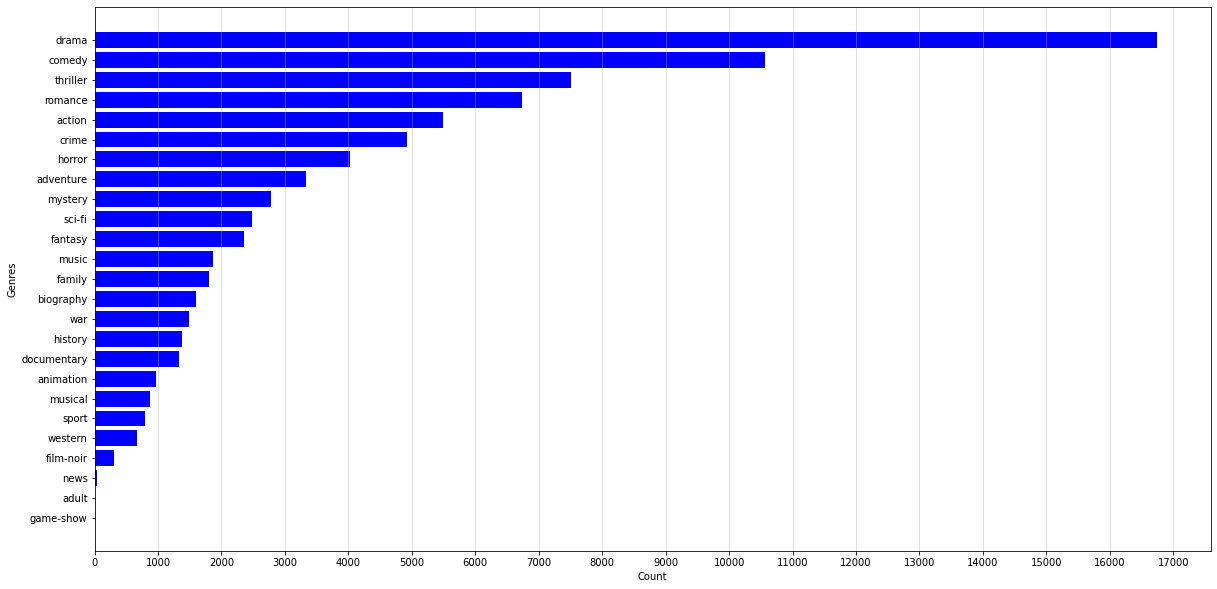

In [ ]:
genre_df = genre_df.sort_values('Count', ascending=True)
plt.figure(figsize=(20,10))
plt.barh(genre_df['Genre'], genre_df['Count'], color='blue')

plt.ylabel('Genres')
plt.xlabel('Count')

plt.grid(axis='x', alpha=0.5)
plt.show()

After looking at this plot, it can be noticed that the count of  **News, Adult and Game-Show** is negligible with respect to other genres and can be dropped. 

Let's drop these genres and make a new dataframe which will then be exported.

In [ ]:
df_2 = df
df_2 = df_2.drop(['news','adult','game-show','genre'], axis=1)
df_2

,plot_short,plot_long,action,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,film-noir,history,horror,music,musical,mystery,romance,sci-fi,sport,thriller,war,western
0,"Hypnotist Dr. Caligari uses a somnambulist, Ce...","Francis, a young man, recalls in his memory th...",0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0
1,"In 16th-century Prague, a rabbi creates the Go...","In 16th-century Prague, a rabbi creates the Go...",0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,A naive country girl is tricked into a sham ma...,"The callous rich, portrayed by Lennox, think o...",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,Dr. Henry Jekyll experiments with scientific m...,Based on the Robert Louis Stevenson story: Doc...,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,"Abandoned by her fiancé, an educated black wom...",Southern negro Sylvia Landry visits her cousin...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30077,The story is about friendship and family witch...,The story is about friendship and family witch...,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30078,Feature adaptation of Rapman's YouTube series ...,Blue Story is a tragic tale of a friendship be...,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30079,A man returns home to Atlanta to help his brot...,"A good man (Tip ""T.I."" Harris) returns home to...",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30080,A grieving widower moves to the country where ...,A grieving widower moves to the country where ...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In this dataset we have 2 type of plots, Long and Short. I wanted to create a setup where I will use plot_short to train one model and plot_long to train the other model but I feel it's better to train the model with plot_long as it has more characters. 

So I will be removing the plot_short from the dataset so that it will be ready for Pre Processing

In [ ]:
df_2 = df_2.drop(['plot_short'], axis=1)
df_2

,plot_long,action,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,film-noir,history,horror,music,musical,mystery,romance,sci-fi,sport,thriller,war,western
0,"Francis, a young man, recalls in his memory th...",0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0
1,"In 16th-century Prague, a rabbi creates the Go...",0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,"The callous rich, portrayed by Lennox, think o...",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,Based on the Robert Louis Stevenson story: Doc...,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,Southern negro Sylvia Landry visits her cousin...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30077,The story is about friendship and family witch...,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30078,Blue Story is a tragic tale of a friendship be...,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30079,"A good man (Tip ""T.I."" Harris) returns home to...",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30080,A grieving widower moves to the country where ...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


Our encoded dataset is ready to be exported!

In [ ]:
df_2.to_csv('/content/drive/MyDrive/Colab Files/MGP/Datasets/df_2.csv')